In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
pd.options.display.precision = 4

### Load your pickled data

In [2]:
df = pd.read_pickle('../1.Titanic/Data/df.pickle')

In [3]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
name,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,211.3375,S
"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,151.5500,S
"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,151.5500,S
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,151.5500,S
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,151.5500,S


### Assign the `survived` column to `target`

In [4]:
target = df['survived']

In [5]:
target.head()

name
Allen, Miss. Elisabeth Walton                      1
Allison, Master. Hudson Trevor                     1
Allison, Miss. Helen Loraine                       0
Allison, Mr. Hudson Joshua Creighton               0
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    0
Name: survived, dtype: int64

### Drop the `survived` column and assign the result to `features`

In [6]:
features = df.drop('survived', axis=1)

In [7]:
features.head()

,pclass,sex,age,sibsp,parch,fare,embarked
name,,,,,,,
"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S


# Data transformations
Now we need to format the remaining data in a way that our machine learning algorithms will accept. Double-check your numerical and categorical data so we can correctly format the remaining categorical data in a way that our machine learning algorithms will accept.

### Do a `pd.get_dummies` to transform categorical data
* `Sex`
* `Embarked`

`pd.get_dummies` will turn non-numeric data into numeric data, but it will also blow up the size of your dataset. That's why it's important to get rid of large categorical data before doing this (unless you think it's an important feature and you have the computing capacity). 

In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, Allen, Miss. Elisabeth Walton to Zimmerman, Mr. Leo
Data columns (total 7 columns):
pclass      1306 non-null int64
sex         1306 non-null object
age         1306 non-null float64
sibsp       1306 non-null int64
parch       1306 non-null int64
fare        1306 non-null float64
embarked    1306 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 81.6+ KB


In [9]:
features_numeric = pd.get_dummies(features)

In [10]:
features_numeric.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
name,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,211.3375,1,0,0,0,1
"Allison, Master. Hudson Trevor",1,0.9167,1,2,151.5500,0,1,0,0,1
"Allison, Miss. Helen Loraine",1,2.0000,1,2,151.5500,1,0,0,0,1
"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,151.5500,0,1,0,0,1
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,151.5500,1,0,0,0,1


**Formatting subplots**

These are subplot grid parameters encoded as a single integer. For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".

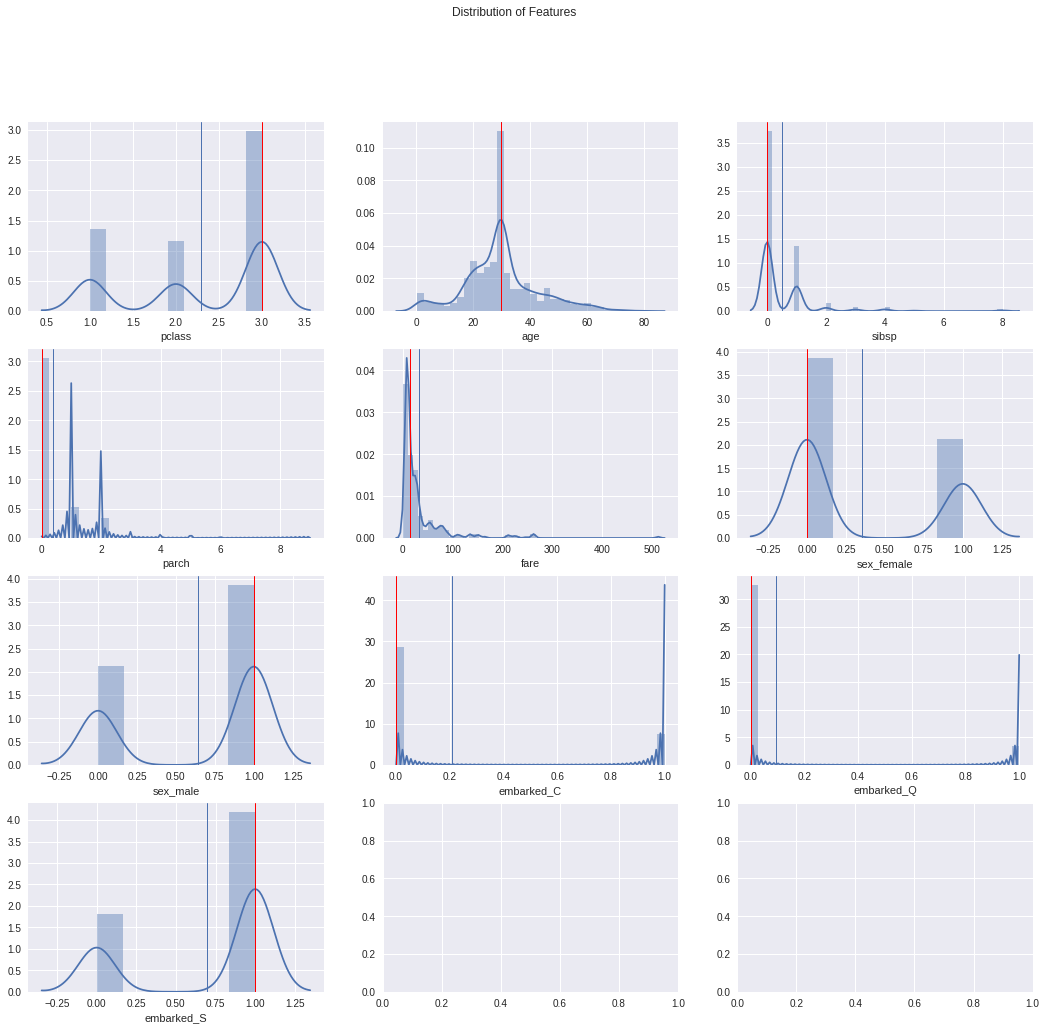

In [11]:
fig, axes = plt.subplots(4,3)
axes = axes.flatten()
fig.set_size_inches(18, 16)
fig.suptitle('Distribution of Features')

for i, col in enumerate(features_numeric.columns):
    feature = features_numeric[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

With a red color palette prepare a single kdeplot for all of the features, then only for non-categorical features:
* `Age`
* `Fare`

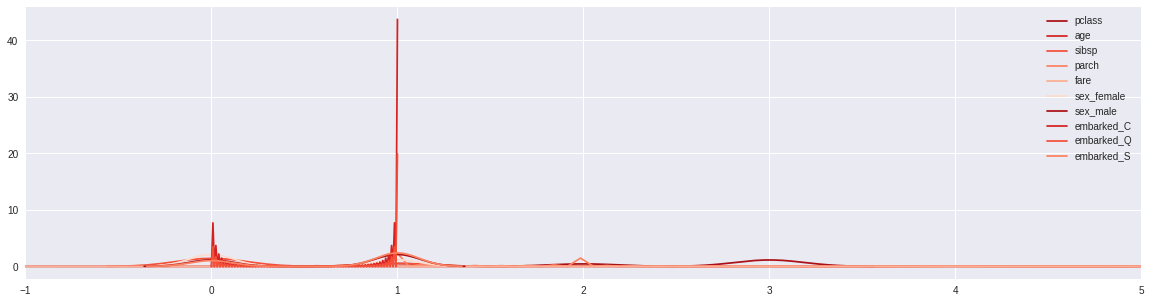

In [35]:
with sns.color_palette('Reds_r'):
    fig = plt.figure(figsize=(20,5))
    plt.xlim(-1,5)
    for col in features_numeric.columns:
        sns.kdeplot(features_numeric[col], label=col)

In [36]:
plot_list = ['age', 'fare']

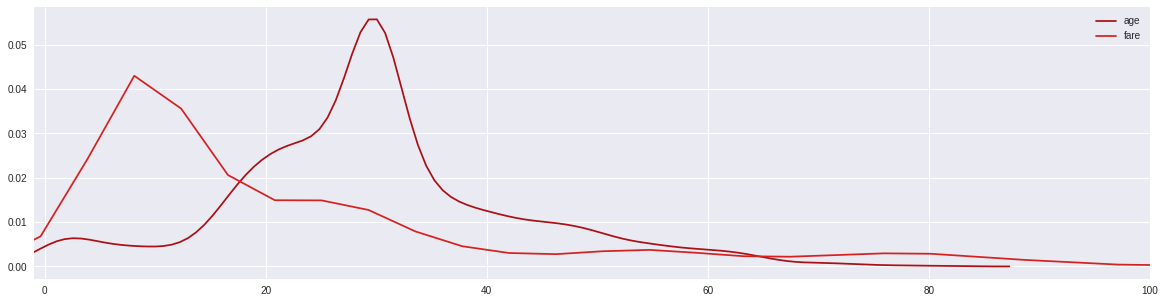

In [37]:
# This usually works best on datasets with many numerical features
with sns.color_palette('Reds_r'):
    fig = plt.figure(figsize=(20,5))
    plt.xlim(-1,100)
    for col in features_numeric[plot_list]:
        sns.kdeplot(features_numeric[col], label=col)

Use a for-loop and subplots to prepare a swarmplot for each feature
* Use `target` as the x-axis
* Use `Sex` as the hue

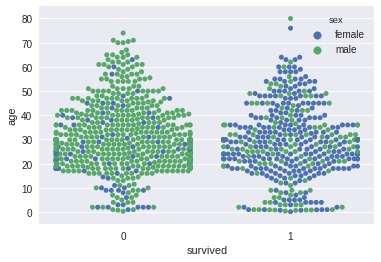

In [39]:
sns.swarmplot(df['survived'], df['age'], hue=df['sex'])

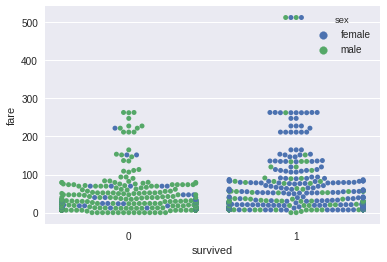

In [40]:
sns.swarmplot(df['survived'], df['fare'], hue=df['sex'])

### <s>Test for skewness</s>

In [20]:
# from scipy.stats import skew, skewtest
# # Lets loop through these and print out the skew for each one

# columns_to_deskew = []
# for col in features_numeric[plot_list]:
#     print("The skew for column {} is: {}".format(col, skew(features_numeric[col])))
#     if abs(skew(features_numeric[col])) > .8:
#         columns_to_deskew.append(col)
# columns_to_deskew
# # Skew is >.8, so if it's less than .8 that's what we want.

The skew for column pclass is: -0.6010113223714886
The skew for column age is: 0.45144192742120065
The skew for column sibsp is: 3.8353997637752237
The skew for column parch is: 3.660307627864055
The skew for column fare is: 4.370555266010648
The skew for column sex_female is: 0.6047512348265562
The skew for column sex_male is: -0.6047512348265562
The skew for column embarked_C is: 1.4483282768953991
The skew for column embarked_Q is: 2.778823335332526
The skew for column embarked_S is: -0.868103844760679


['sibsp', 'parch', 'fare', 'embarked_C', 'embarked_Q', 'embarked_S']

In [21]:
# features_numeric.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [22]:
# # Deskew non-categorical
# features_to_be_deskewed = ['age', 'sibsp', 'parch', 'fare']

In [23]:
# features_not_to_be_deskewed = list(set(features_numeric.columns) - set(features_to_be_deskewed))
# features_not_to_be_deskewed

['embarked_S', 'sex_male', 'embarked_Q', 'pclass', 'sex_female', 'embarked_C']

In [24]:
# deskewed = features_numeric[features_to_be_deskewed]
# deskewed = np.log(1+deskewed)
# not_deskewed = features_numeric[features_not_to_be_deskewed]
# features_deskewed = pd.merge(deskewed, not_deskewed, left_index=True, right_index=True)
# features_deskewed.head()

,age,sibsp,parch,fare,embarked_S,sex_male,embarked_Q,pclass,sex_female,embarked_C
name,,,,,,,,,,
"Abbing, Mr. Anthony",3.7612,0.0000,0.0000,2.1459,1,1,0,3,0,0
"Abbott, Master. Eugene Joseph",2.6391,0.0000,1.0986,3.0564,1,1,0,3,0,0
"Abbott, Mr. Rossmore Edward",2.8332,0.6931,0.6931,3.0564,1,1,0,3,0,0
"Abbott, Mrs. Stanton (Rosa Hunt)",3.5835,0.6931,0.6931,3.0564,1,0,0,3,1,0
"Abelseth, Miss. Karen Marie",2.8332,0.0000,0.0000,2.1576,1,0,0,3,1,0


## Scale data

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
features_numeric_scaled = scaler.fit_transform(features_numeric)

In [50]:
features_numeric.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
name,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,211.3375,1,0,0,0,1
"Allison, Master. Hudson Trevor",1,0.9167,1,2,151.5500,0,1,0,0,1
"Allison, Miss. Helen Loraine",1,2.0000,1,2,151.5500,1,0,0,0,1
"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,151.5500,0,1,0,0,1
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,151.5500,1,0,0,0,1


In [51]:
features_numeric_scaled = pd.DataFrame(features_numeric_scaled, columns=features_numeric.columns)
features_numeric_scaled.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,-1.5493,-0.0644,-0.4798,-0.4456,3.4421,1.3471,-1.3471,-0.5105,-0.3224,0.6561
1,-1.5493,-2.2529,0.4798,1.8638,2.2867,-0.7423,0.7423,-0.5105,-0.3224,0.6561
2,-1.5493,-2.1685,0.4798,1.8638,2.2867,1.3471,-1.3471,-0.5105,-0.3224,0.6561
3,-1.5493,0.0135,0.4798,1.8638,2.2867,-0.7423,0.7423,-0.5105,-0.3224,0.6561
4,-1.5493,-0.3761,0.4798,1.8638,2.2867,1.3471,-1.3471,-0.5105,-0.3224,0.6561


## Visualize the data using PCA (this can only be done after data is transformed into numeric values)

Perform PCA on your data. Plot PC1 and PC2. Visually, how many clusters do you think we should have?

In [52]:
from sklearn.decomposition import PCA

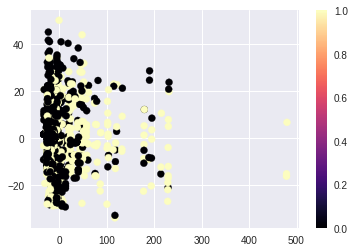

In [53]:
# Try it on the original data first (before transformations - scaling)

pca = PCA()
features_pca = pca.fit_transform(features_numeric)

plt.scatter(features_pca[:,0], features_pca[:,1], c=target, cmap='magma')
plt.colorbar()

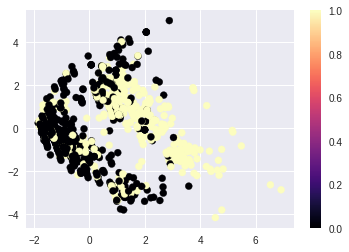

In [54]:
# PCA works best on scaled data - always scale before running it through PCA

pca = PCA()
features_pca = pca.fit_transform(features_numeric_scaled)

plt.scatter(features_pca[:,0], features_pca[:,1], c=target, cmap='magma')
plt.colorbar()

Use KMeans clustering to visualize different clusterings of your data.

In [55]:
from sklearn.cluster import KMeans

In [56]:
km_pca = KMeans(n_clusters=3)
km_pca.fit(features_pca[:,:2])

km_og = KMeans(n_clusters=3)
km_og.fit(features_deskewed_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

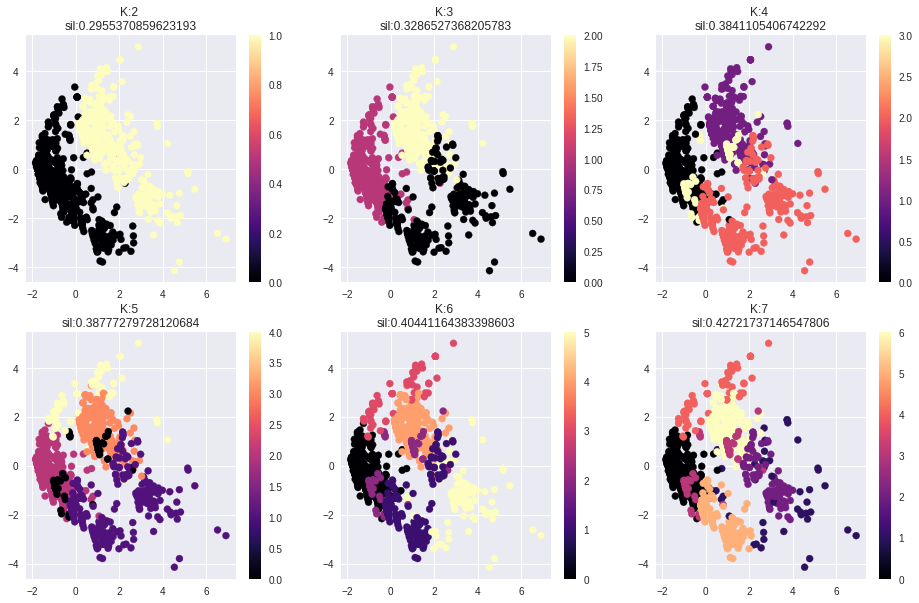

In [59]:
ks = []
sils = []
plt.figure(figsize=(16,10))
for i,k  in enumerate(range(2,8)):
    km = KMeans(n_clusters=k)
    km.fit(features_numeric_scaled)
    plt.subplot(2,3,1+i)
    plt.scatter(features_pca.T[0], features_pca.T[1], c=km.labels_, cmap='magma')
    plt.title('K:{} \nsil:{}'.format(k, silhouette_score(features_numeric_scaled, km.labels_)))
    plt.colorbar()
    ks.append(k)
    sils.append(silhouette_score(features_numeric_scaled, km.labels_))

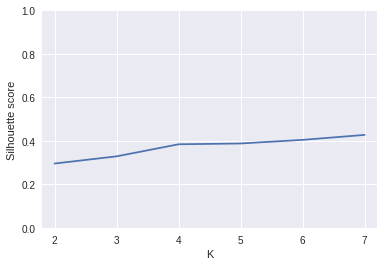

In [60]:
plt.plot(ks, sils)
plt.ylim(0,1)
plt.xlim(1.8,7.2)
plt.xlabel('K')
plt.ylabel('Silhouette score')

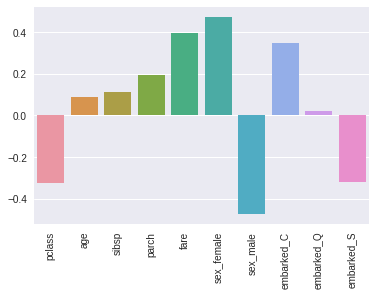

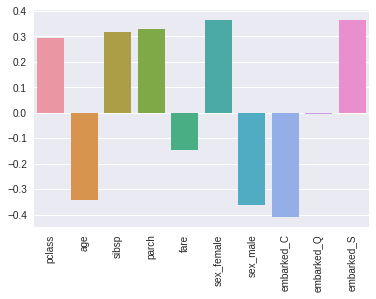

In [61]:
for component in pca.components_[:2]:
    sns.barplot(features_numeric_scaled.columns,component)
    plt.xticks(rotation=90)
    plt.show()

In [63]:
pd.to_pickle(features_numeric, '../1.Titanic/Data/features_numeric.pickle')

In [64]:
pd.to_pickle(features_numeric_scaled, '../1.Titanic/Data/features_numeric_scaled.pickle')

In [65]:
pd.to_pickle(target, '../1.Titanic/Data/target.pickle')